In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model
%matplotlib inline

/Users/jpfaendt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


**This notebook contains a simple regression example as well as an example of multiple linear regression using the HCEPDB** 

The purpose is to demonstrate the basic use of sklearn (library linear_model) for simple regression problems 

In the first example, we generate training data with random noise for the model $Y=4+3*X_1$ 

In the second example, we generate model based on the idea that the $PCE$ of a candidate organic photovoltaic can be modeled as a contribution of the molecule's $mass$, $VOC$ and $E_{LUMO}$ values:  $PCE = \beta_0 + \beta_1*mass + \beta_2*VOC + \beta_3 * E_{LUMO}$

In [95]:
#model: Y = 3X + 4 
pts=25
x=np.linspace(-50,50,num=pts)
B0=4
B1=3
yactual=B0+B1*x
np.random.seed(123)
#add noise scaled to 25% of range to data
yrand=yactual+.25*(yactual.max()-yactual.min())*np.random.normal(size=pts)

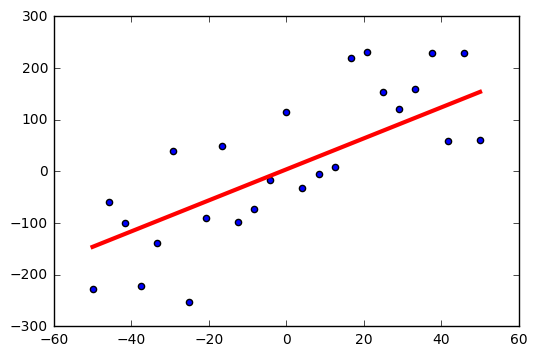

In [96]:
plt.plot(x,yactual,color='red',lw='3')
plt.scatter(x,yrand)

In [101]:
regr=linear_model.LinearRegression()
# note that x.reshape(-1,1) is required because I must strictly
# feed regr.fit a 200x1 array , np.linspace returned a list of numbers
regr.fit(x.reshape(-1,1),yrand)
print('B0, B1: ',regr.intercept_, regr.coef_[0])

('B0, B1: ', 14.507709255350628, 3.7621765746555575)


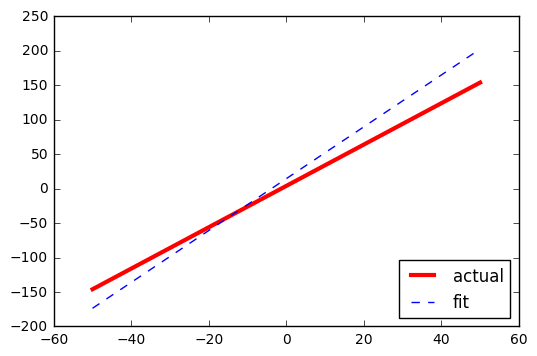

In [98]:
plt.plot(x,yactual,color='red',lw='3',label='actual')
plt.plot(x,regr.predict(x.reshape(-1,1)),ls='--',label='fit')
plt.legend(loc='lower right')

### Who would like to guess what you are going to do on HW 4 to finish this notebook? :) 

### Missing information for assessing coefficients: 

* 95% CI 
* Standard Error for $\beta_0$ and $\beta _1$
* P-value for test of $H_0$

### Missing information for assessing the model: 

* RSE , RSS , $R^2$

In [2]:
harvard=pd.read_csv('../Week1/HCEPD_100K.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dd00210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123bd1050>]], dtype=object)

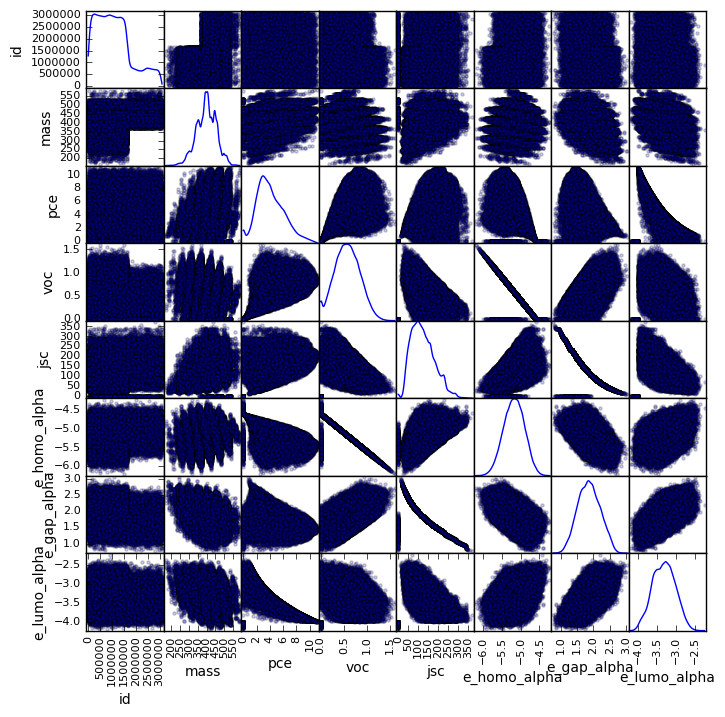

In [100]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(harvard, alpha=0.2, figsize=(8, 8), diagonal='kde')

In [3]:
# lets see if we can predict PCE as a function of mass, voc, and e_lumo_alpha
regr2=linear_model.LinearRegression()

In [4]:
regr2.fit(harvard[['mass','voc','e_lumo_alpha']],harvard.pce)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

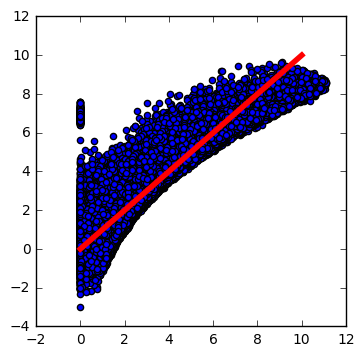

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(harvard.pce,regr2.predict(harvard[['mass','voc','e_lumo_alpha']]))
plt.plot([0,10],[0,10],lw=4,color='red')